# Best practices in data visualization - ASPP 2022, Bilbao
## Exercise 3 - Working with images

(Material adapted from [tutorials by Nicolas Rougier](https://github.com/ASPP/2021-bordeaux-dataviz))

#### Initialization 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

#p = plt.rcParams
#p["figure.dpi"] = 300

%matplotlib inline 
# this line avoids writing plt.show() for every image

### 1. Generating the data 

In this exercise, we are going to focus on function [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) which means *image show*. We are going to learn to use it and then play with it a bit.

Let's first generate some 2D data.

In [16]:
np.random.seed(1)
X = np.random.uniform(0,10,250)
Y = X*np.abs(np.random.normal(0,1,len(X)))**2

In [17]:
# f is an two-variable arbitrary function, we will sample from this function
def f(x,y,n=100):
    X,Y = np.meshgrid(np.linspace(-3, 3, n),
                      np.linspace(-3, 3, n))
    return (1-X/2+X**5+Y**3)*np.exp(-X**2-Y**2)

We are now ready to display them.

In [18]:
Z5  = f(X, Y, n=5) # 5 values along the x and y axis
Z10 = f(X, Y, n=10) 
Z25 = f(X, Y, n=25) 
Z100 = f(X, Y, n=100) 

### 2. Making image plots 

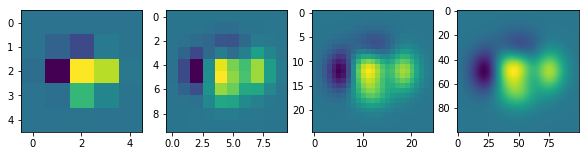

In [19]:
fig = plt.figure(figsize=(10,4))
ax = plt.subplot(1,4,1); ax.imshow(Z5)
ax = plt.subplot(1,4,2); ax.imshow(Z10)
ax = plt.subplot(1,4,3); ax.imshow(Z25)
ax = plt.subplot(1,4,4); ax.imshow(Z100)

### 3. Extent 
To be able to display these images, matplotlib made several implicit choices. 

First, you may have noticed that the limit on the axis are different on each of the three plots and do not relate to the [-3,+3] domain we used to define the image. The reason is that matplotlib has not idea where your images come from and cannot guess what the axis' units and its limits are. To solve this problem, we thus need to specify the extent of the image.

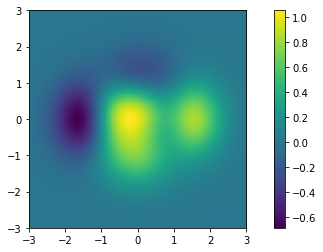

In [20]:
fig = plt.figure(figsize=(10,4))
extent = [-3,+3,-3,+3]
plt.imshow(Z100, extent=extent)
plt.colorbar()

### 4. Colormap 

The second choice matplotlib made concerns colors. Our arrays `Z5`, `Z10` and `Z25` are really two-dimensional scalar arrays and the question is thus, how do we map a scalar to a color? To do that, matplotlib uses what is called a colormap that map a normalized value to a given color. The default colormap is called "viridis" but there are [plenty of others](https://matplotlib.org/stable/tutorials/colors/colormaps.html). Let's try "RdYlBu".

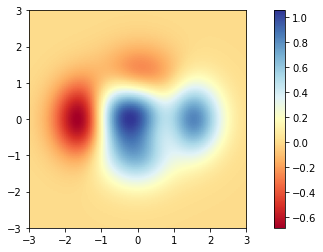

In [21]:
fig = plt.figure(figsize=(10,4))
extent = [-3,+3,-3,+3]
plt.imshow(Z100, extent=extent, cmap="RdYlBu")
plt.colorbar() # displays the colorbar on the right, with the corresponding numerical mapping

### 5. Interpolation 

On important implicit choice when displaying image is the interpolation methods between pixels composing the output. The default method is to use the nearest filter which results in pixelated images. This is a sane default for scientific visualization. However, in some specific case, you might want to use a smoother interpolation method and you can do so by providing the name to method among [those availables](https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html?highlight=interpolation). Let's see the effect of the bicubic method.

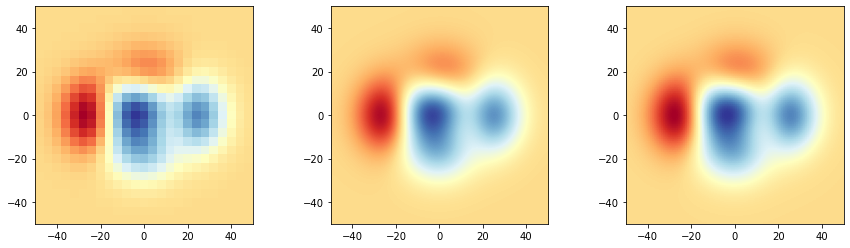

In [22]:
fig = plt.figure(figsize=(15,4))

extent = [-50,+50,-50,+50]
cmap = "RdYlBu"
interpolation = "bicubic"

ax = plt.subplot(1,3,1);
im = ax.imshow(Z25, extent=extent, cmap=cmap) # default interpolation is 'none'
ax = plt.subplot(1,3,2);
ax.imshow(Z25, extent=extent, cmap=cmap, interpolation=interpolation)
ax = plt.subplot(1,3,3); 
ax.imshow(Z100, extent=extent, cmap=cmap)

### 6. Adding a colorbar and setting max and min for the color mapping 

Since we are using a colormap we need to show how scalar values are mapped to colors and for this we need to add a colorbar. We do this with the function `plt.colorbar()`, together with gridspec so to make room for the colorbar on the right. 

Finally, we can explicitely tell matplotlib what is the minimum and maximum values that will be mapped to the colormap. These are the argumetns `vmin` and `vmax` in `imshow`.


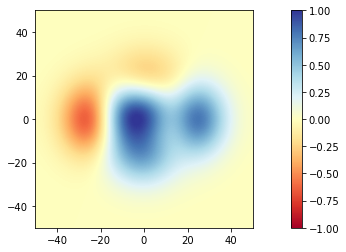

In [23]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(5,4))
G = GridSpec(1, 2, width_ratios=(20, 1))

extent = [-50,+50,-50,+50]
cmap = "RdYlBu"
interpolation = "bicubic"
vmin, vmax = -1, 1

ax = plt.subplot(G[0], aspect=1);
I = ax.imshow(Z25, extent=extent, interpolation=interpolation,
              cmap=cmap,  vmin=vmin, vmax=vmax)
plt.colorbar(I, cax=plt.subplot(G[1], aspect=10))

### 7. Contour

To finish our plot, let's add some contour levels using the [contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) function. Since we have several arrays showing the same data with different resolution ( `Z5`, `Z10`, `Z25`, `Z50` and `Z100` ), we can use the highest resolution to compute the contours. This will result in much smoother curves. Note that we need to vertically re-orient the contour (using the `origin` argument) such that it matches the orientation of the image.

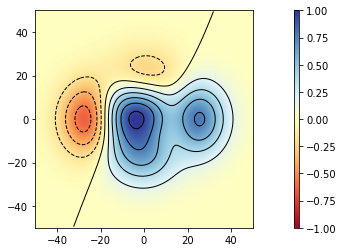

In [24]:
fig = plt.figure(figsize=(5,4))
G = GridSpec(1, 2, width_ratios=(20, 1))

extent = [-50,+50,-50,+50]
cmap = "RdYlBu"
interpolation = "bicubic"
vmin, vmax = -1, 1

ax = plt.subplot(G[0], aspect=1);
I = ax.imshow(Z25, extent=extent, interpolation=interpolation,
              cmap=cmap,  vmin=vmin, vmax=vmax)
C = ax.contour(Z100, levels=10, extent=extent, origin="upper",
               colors="black", linewidths=1)
    
plt.colorbar(I, cax=plt.subplot(G[1], aspect=20))

## Exercise A

In this exercise we create an image and update it iteratively with new data points. We start with a grid full of zeros.

- Write code that fills the template below. On each iteration you should update the matrix Z by adding +1 at a random location in the matrix (Hint: use `np.random.randint()` to get random integers)

- Try different interpolation methods and see what happens.

- Try different [colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html). Which kind of colormap is appropiate and which not?


- Now instead of adding always one, on each iteration randomly pick whether you add 1 or substract 1. Which color map does make sense for this case?

<IPython.core.display.Javascript object>


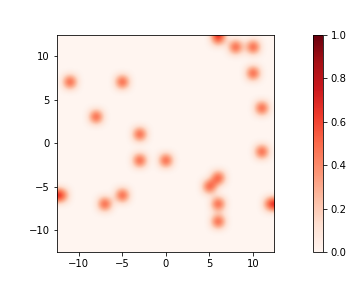

In [25]:
# here we come back to 'notebook' mode, where we need to do plt.show() to show the figure
%matplotlib notebook 

data_size = 25
Z = np.zeros((data_size, data_size))

fig = plt.figure(figsize=(5,4))
ax = plt.subplot(G[0], aspect=1);
fig.show()

d = data_size / 2
extent = [-d, +d, -d, +d]
G = GridSpec(1, 2, width_ratios=(20, 1))

for i in range(20):
    
    # your code here!
    a, b = np.random.randint(data_size, size=2)
    Z[a, b] = Z[a, b] + 1
    I = ax.imshow(Z, extent=extent, interpolation="bicubic", cmap="Reds",  vmin=0, vmax=1)
    plt.colorbar(I, cax=plt.subplot(G[1], aspect=20))
    # end of your code here
    
    fig.canvas.draw() 
    plt.pause(0.25)
    
plt.show()

<IPython.core.display.Javascript object>


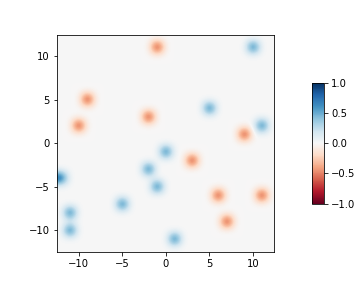

In [26]:
data_size = 25
Z = np.zeros((data_size, data_size))

fig = plt.figure(figsize=(5,4))
ax = plt.subplot(G[0], aspect=1);
fig.show()

d = data_size / 2
extent = [-d, +d, -d, +d]
G = GridSpec(1, 2, width_ratios=(20, 1))

for i in range(20):
    
    # your code here!
    a, b = np.random.randint(data_size, size=2)
    p = np.random.randint(2)
    if p==0:
        Z[a, b] = Z[a, b] + 1
    else:
        Z[a, b] = Z[a, b] - 1
    I = ax.imshow(Z, extent=extent, interpolation="bicubic", cmap="RdBu")
    plt.colorbar(I, cax=plt.subplot(G[1], aspect=5))
    # end of your code here
    
    fig.canvas.draw() 
    plt.pause(0.25)
    
plt.show()

## Exercise B

Now let's say that we have a grid with a couple of gaussians, and one of them is updated (its mean).

In [27]:
# define normalized 2D gaussian
def gaus2d(x=0, y=0, mx=0, my=0, sx=1, sy=1):
    return 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))

x = np.linspace(-5, 5)
y = np.linspace(-5, 5)
x, y = np.meshgrid(x, y) # get 2D variables instead of 1D

- Write code that fills the template below. On each iteration you should update the matrix Z by updating the location of z2 Gaussian. As in the previous exercise, you can use `np.random.randint()` to get random integers that you will use to update the location of the Gaussian.

- Use contour to look at the interaction between the different Gaussians. 

<IPython.core.display.Javascript object>


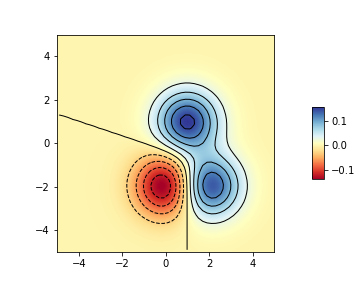

In [28]:
from IPython.display import display, clear_output

fig = plt.figure(figsize=(5,4))
ax = plt.subplot(G[0], aspect=1);
contour_axis = plt.gca()
fig.show()

extent = [-5,+5,-5,+5]
G = GridSpec(1, 2, width_ratios=(20, 1))

mx_i = -1
my_i = 1
z0 = gaus2d(x, y, mx=1, my=-1)
z1 = gaus2d(x, y, mx=2, my=2)
z2 = gaus2d(x, y, mx=mx_i, my=my_i)
Z = z0 + z1 - z2

for i in range(10):
    contour_axis.clear()
    
    # your code here!
    a, b = np.random.randint(3, size=2) - 1
    z2 = gaus2d(x, y, mx=mx_i + a, my=my_i + b)
    Z = z0 + z1 - z2
    
    I = ax.imshow(Z, extent=extent, interpolation="bicubic", cmap="RdYlBu",  vmin=Z.min(), vmax=Z.max())
    C = ax.contour(Z, levels=10, extent=extent, origin="upper", colors="black", linewidths=1)
    plt.colorbar(I, cax=plt.subplot(G[1], aspect=20))
    # end of your code here
    
    fig.canvas.draw()
    plt.pause(0.5)